In [24]:
### Import Dependancies

import scanpy as sc
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import sklearn

In [ ]:
### Read in Data and create anndata object

#read in raw counts matrix
adata = sc.read_mtx('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/scRNA Seq Automation/ML data/NSLC data/raw_counts.mtx')
adata = adata.T

adata

# Load and set the gene names
gene_names = pd.read_csv('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/scRNA Seq Automation/ML data/NSLC data/gene_names.csv')
adata.var_names = gene_names['x'].values

# Load and set the cell names
cell_names = pd.read_csv('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/scRNA Seq Automation/ML data/NSLC data/barcodes.csv')
adata.obs_names = cell_names['x'].values



In [33]:
#check dimensions of adata object 
adata

AnnData object with n_obs × n_vars = 224611 × 72131

In [34]:
#read in meta data
metadata = pd.read_csv('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/scRNA Seq Automation/ML data/NSLC data/metadata.csv', index_col=0)

#align the meta data so that barcode order matches barcodes in data
aligned_csv_data = metadata.reindex(adata.obs_names)

#add meta data to .obs of adata
adata.obs = pd.concat([adata.obs, aligned_csv_data], axis=1)

#view meta data
adata.obs

/var/folders/n1/zbp5__v174n08pvjknrstbt80000gp/T/ipykernel_97211/4117251572.py:2: DtypeWarning: Columns (13,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/scRNA Seq Automation/ML data/NSLC data/metadata.csv', index_col=0)


,orig.ident,nCount_RNA,nFeature_RNA,Percent_mt,Patient,Gender,Subtype,Stage,seurat_clusters,Study,Cell_Cluster_level1,Cell_Cluster_level2,validation_original_annotation,id,predicted.celltypel1.score,predicted.celltypel1,predicted.celltypel2.score,predicted.celltypel2
P1_X1_TCCCATTCTCCT,X1,6872.0,421,1.309662,S5P1,F,squamous cell carcinoma,III/IV,0,GSE148071,T,Naive T,NaN,Reference,NaN,NaN,NaN,NaN
P1_X1_AGCTCCGGCACC,X1,12658.0,2512,6.367515,S5P1,F,squamous cell carcinoma,III/IV,10,GSE148071,Cancer,CXCL1 Cancer,NaN,Reference,NaN,NaN,NaN,NaN
P1_X1_TACCATTACTTG,X1,11646.0,1679,9.222050,S5P1,F,squamous cell carcinoma,III/IV,6,GSE148071,Plasma,Plasma,NaN,Reference,NaN,NaN,NaN,NaN
P1_X1_TGTCTCGCATCC,X1,11038.0,1229,4.076826,S5P1,F,squamous cell carcinoma,III/IV,6,GSE148071,Plasma,Plasma,NaN,Reference,NaN,NaN,NaN,NaN
P1_X1_TAGACTACGTAG,X1,9671.0,1606,9.854203,S5P1,F,squamous cell carcinoma,III/IV,6,GSE148071,Plasma,Plasma,NaN,Reference,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p7t2_bcCRCT,SeuratProject,648.0,335,2.006173,S1P7,F,adenocarcinoma,III,13,GSE127465,Myeloid,Neutrophils,Neutrophils,Validation,1.0,Myeloid cells,1.000000,Neutrophils
p7t2_bcFAUI,SeuratProject,550.0,336,18.363636,S1P7,F,adenocarcinoma,III,16,GSE127465,Mast,Mast,Mast cells,Validation,1.0,Mast cells,1.000000,Mast cells
p7t2_bcFHTY,SeuratProject,549.0,367,5.828780,S1P7,F,adenocarcinoma,III,2,GSE127465,Myeloid,Lipid-associated Mac,Macrophages,Validation,1.0,Myeloid cells,0.698839,Lipid-associated moMac
p7t2_bcBHQQ,SeuratProject,429.0,295,6.060606,S1P7,F,adenocarcinoma,III,15,GSE127465,Myeloid,Low quality Mac,Macrophages,Validation,1.0,Myeloid cells,0.839702,Low quality Mac


In [ ]:
#save file as h5ad
adata.write_h5ad('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/scRNA Seq Automation/ML data/NSLC data/raw_data.h5ad')

In [ ]:
#read in saved file
adata = sc.read_h5ad('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/ML data/NSLC data/raw_data.h5ad')
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,Percent_mt,Patient,Gender,Subtype,Stage,seurat_clusters,Study,Cell_Cluster_level1,Cell_Cluster_level2,validation_original_annotation,id,predicted.celltypel1.score,predicted.celltypel1,predicted.celltypel2.score,predicted.celltypel2
P1_X1_TCCCATTCTCCT,X1,6872.0,421,1.309662,S5P1,F,squamous cell carcinoma,III/IV,0,GSE148071,T,Naive T,NaN,Reference,NaN,NaN,NaN,NaN
P1_X1_AGCTCCGGCACC,X1,12658.0,2512,6.367515,S5P1,F,squamous cell carcinoma,III/IV,10,GSE148071,Cancer,CXCL1 Cancer,NaN,Reference,NaN,NaN,NaN,NaN
P1_X1_TACCATTACTTG,X1,11646.0,1679,9.222050,S5P1,F,squamous cell carcinoma,III/IV,6,GSE148071,Plasma,Plasma,NaN,Reference,NaN,NaN,NaN,NaN
P1_X1_TGTCTCGCATCC,X1,11038.0,1229,4.076826,S5P1,F,squamous cell carcinoma,III/IV,6,GSE148071,Plasma,Plasma,NaN,Reference,NaN,NaN,NaN,NaN
P1_X1_TAGACTACGTAG,X1,9671.0,1606,9.854203,S5P1,F,squamous cell carcinoma,III/IV,6,GSE148071,Plasma,Plasma,NaN,Reference,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p7t2_bcCRCT,SeuratProject,648.0,335,2.006173,S1P7,F,adenocarcinoma,III,13,GSE127465,Myeloid,Neutrophils,Neutrophils,Validation,1.0,Myeloid cells,1.000000,Neutrophils
p7t2_bcFAUI,SeuratProject,550.0,336,18.363636,S1P7,F,adenocarcinoma,III,16,GSE127465,Mast,Mast,Mast cells,Validation,1.0,Mast cells,1.000000,Mast cells
p7t2_bcFHTY,SeuratProject,549.0,367,5.828780,S1P7,F,adenocarcinoma,III,2,GSE127465,Myeloid,Lipid-associated Mac,Macrophages,Validation,1.0,Myeloid cells,0.698839,Lipid-associated moMac
p7t2_bcBHQQ,SeuratProject,429.0,295,6.060606,S1P7,F,adenocarcinoma,III,15,GSE127465,Myeloid,Low quality Mac,Macrophages,Validation,1.0,Myeloid cells,0.839702,Low quality Mac


In [ ]:
#Check what datasets are present and what diseases are in each
Studies = adata.obs.groupby(['Study', "Subtype"]).size()
print(Studies)


Study      Subtype                
GSE119911  NSCLC                          0
           adenocarcinoma                 0
           squamous cell carcinoma        0
GSE127465  NSCLC                          0
           adenocarcinoma             29313
           squamous cell carcinoma     7868
GSE131907  NSCLC                          0
           adenocarcinoma             39980
           squamous cell carcinoma        0
GSE136246  NSCLC                          0
           adenocarcinoma             44771
           squamous cell carcinoma     8419
GSE148071  NSCLC                       3307
           adenocarcinoma             17622
           squamous cell carcinoma    30983
GSE153935  NSCLC                          0
           adenocarcinoma                 0
           squamous cell carcinoma        0
KU_loom    NSCLC                          0
           adenocarcinoma                 0
           squamous cell carcinoma        0
dtype: int64


/var/folders/n1/zbp5__v174n08pvjknrstbt80000gp/T/ipykernel_79251/1123258256.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Studies = adata.obs.groupby(['Study', "Subtype"]).size()


In [ ]:
#Subset GSE127465 and look at distrobution of cells types within the sub samples
GSE127465 = adata[adata.obs["Study"] == "GSE127465", :]
GSE127465.obs

#get adenocarcinoma cells
GSE127465 = GSE127465[GSE127465.obs["Subtype"]== 'adenocarcinoma', :]
GSE127465.obs

#extract sample number from barcodes and add it to .obs as a new column
GSE127465_samples = [name.split('_')[0] for name in GSE127465.obs_names]
GSE127465.obs["Sample"] = GSE127465_samples

GSE127465.obs


# look at cell distrobution for each eample 
cell_dist = GSE127465.obs.groupby(['Sample', 'Cell_Cluster_level1']).size()

print(cell_dist)

cell_dist.to_csv('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/ML data/NSLC data/GSE127465_dist.csv', index=True)


#extract samplple p5t2
p5t2 = GSE127465[GSE127465.obs["Sample"] == "p5t2",:]
p5t2.obs

p5t2.write_h5ad('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/ML data/NSLC data/p5t2.h5ad')


#generate negative control sample for p5t2
P5t2_negative_control = p5t2[p5t2.obs['Cell_Cluster_level1'] != 'Cancer']
P5t2_negative_control.write_h5ad('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/ML data/Intermediate/p5t2_negative_control.h5ad')


/var/folders/n1/zbp5__v174n08pvjknrstbt80000gp/T/ipykernel_79251/2371635092.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  GSE127465.obs["Sample"] = GSE127465_samples
/var/folders/n1/zbp5__v174n08pvjknrstbt80000gp/T/ipykernel_79251/2371635092.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p3t1_negative_control.obs.groupby(['Cell_Cluster_level1']).size()
/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/scRNA Seq Automation/scRNA-seq-Automation/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


Data summary statistics:
Min value: 0.0
Max value: 7.969336032867432
Mean value: 0.06450849771499634


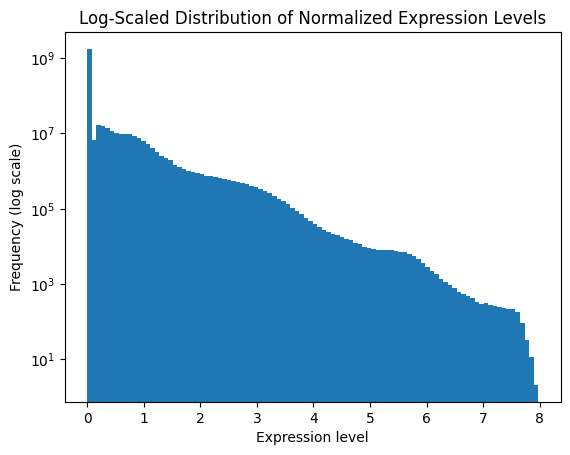

In [ ]:
#determine if model training data is normalized or not
#normalized data shoud appear within a range between 0 and 10
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

#read in the single cell prophiling of LUAD data
scLUAD = sc.read_h5ad('/Users/eriknoyman/Desktop/USC/Senior/Semester 2/BME 405/scRNA Seq Automation/ML data/single cell profiling of LUAD/Lung_scVI_result_annotation_log1p_20230108.h5ad')

# Statistics of data
print("Data summary statistics:")
print(f"Min value: {np.min(scLUAD.X)}")
print(f"Max value: {np.max(scLUAD.X)}")
print(f"Mean value: {np.mean(scLUAD.X)}")

# Plotting the distribution of data values
plt.hist(scLUAD.X.flatten(), bins=100, log=True)
plt.title('Log-Scaled Distribution of Normalized Expression Levels')
plt.xlabel('Expression level')
plt.ylabel('Frequency (log scale)')
plt.show()